Q1. iris data를 불러와서 아래 사항을 수행하세요.

- 결정트리 모델을 시각화하고 주요한 인사이트를 기술하세요.(tree.plot_tree or tree.export_graphviz 이용)
- Feature importance를 추출하고 시각화하세요.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = load_iris()
dt = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 1)

dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'petal length (cm) <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.5, 0.75, 'petal width (cm) <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(0.2, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.25, 'sepal length (cm) <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.5, 0.08333333333333333

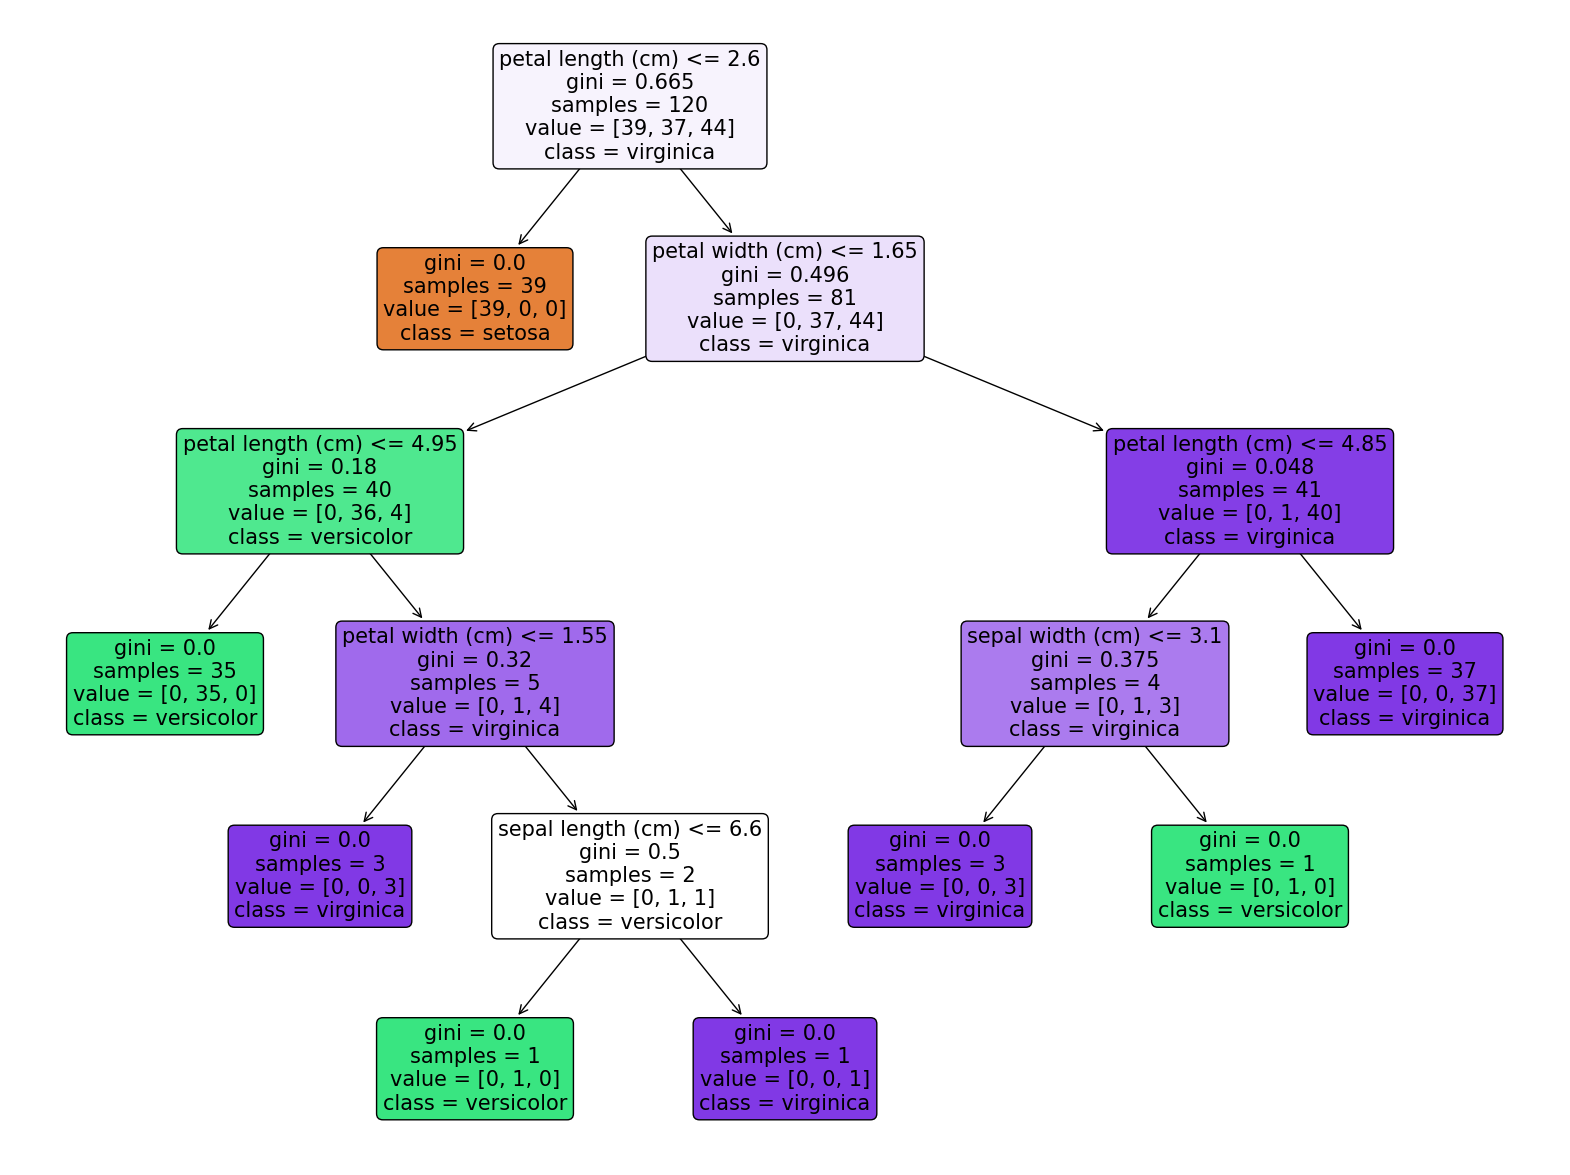

In [9]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt, filled = True,
              feature_names = iris.feature_names,
              class_names = iris.target_names,
              rounded = True, fontsize = 15)

petal length가 2.6 이하인 것을 모두 setosa로 분류하고 있다.

다음은 petal width가 1.65 이하를 지군으로 맞으면 versicolor, 아니면 virginica로 판별하는데,
이 때엔 petal length 조건에 따라 다르게 분류할 수도 있다. max depth가 깊어질수록 여러 조건을 사용해 virginica와 versicolor를 분류하고 있다.

Q2~Q3. 'dataset/creditcard.csv'를 불러와서 신용카드 사기 검출 분류문제를 아래와 같이 수행하세요
- 로지스틱 리그레션을 적용한 모델 학습 및 사용자 함수를 이용하여 평가
    - 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 df 반환하는 사용자 함수 생성
    - 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수(테스트 사이즈 0.3)
    - 오차행렬, 정확도, 정밀도, 재현율, f1, AUC 평가 함수
    
- 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서  학습/예측/평가 수행
    - 사용자 함수를 사용하여 LightGBM으로 모델을 학습한 뒤 별도의 테스트 데이터 세트에서 예측 평가를 수행. 단, n_estimators=1000, num_leaves=64 적용<br>  ※ 레이블 값이 극도로 불균형한 분포를 가지고 있는 경우 boost_from_average=False로 파라미터 설정(default=True). default 설정은 재현율, AUC 성능을 매우 크게 저하시킴
    - 넘파이의 np.log1p( )를 이용하여 Amount를 로그 변환하는 사용자 함수 생성
    - Amount를 로그 변환 후 로지스틱 회귀 및 LightGBM 수행.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

cardDF = pd.read_csv('dataSet/creditcard.csv')

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score


def cut_time(df):
    df2 = df.drop(["Time"], axis = 1)
    return df2

def preprocessing(df, target, random_state = 1):
    y_target = df[target]
    X_data = df.drop(target, axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = random_state)
    return X_train, X_test, y_train, y_test

def get_scores(y_test, pred, pred_proba):
    ac = accuracy_score(y_test, pred)
    pr = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    au = roc_auc_score(y_test, pred_proba[:, 1])
    
    print(confusion_matrix(y_test, pred))
    print(f"accuracy score : {ac:.3}")
    print(f"precision score : {pr:.3}")
    print(f"recall score : {re:.3}")
    print(f"f1 score : {f1:.3}")
    print(f"AUC score : {au:.3}")

In [28]:
df = cut_time(cardDF)
X_train, X_test, y_train, y_test = preprocessing(df, "Class")

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)

In [35]:
get_scores(y_test, pred, pred_proba)

[[85292    16]
 [   61    74]]
accuracy score : 0.999
precision score : 0.822
recall score : 0.548
f1 score : 0.658
AUC score : 0.934


In [36]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)

In [39]:
def log_transform(df, target):
    df[target] = np.log1p(df[target])
    return df

In [40]:
df = log_transform(df, "Amount")

In [41]:
X_train, X_test, y_train, y_test = preprocessing(df, "Class")

In [42]:
lr.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_pred_proba = lr.predict_proba(X_test)

lgbm_pred = lgbm.predict(X_test)
lgbm_pred_proba = lgbm.predict_proba(X_test)

In [43]:
get_scores(y_test, lr_pred, lr_pred_proba)

[[85293    15]
 [   57    78]]
accuracy score : 0.999
precision score : 0.839
recall score : 0.578
f1 score : 0.684
AUC score : 0.967


In [44]:
get_scores(y_test, lgbm_pred, lgbm_pred_proba)

[[85304     4]
 [   32   103]]
accuracy score : 1.0
precision score : 0.963
recall score : 0.763
f1 score : 0.851
AUC score : 0.977


Q4. Q2 신용카드 사기 검출 분류문제에서 아래를 참고하여 이상치 데이터를 제거하고 모델 학습/예측/평가를 수행하세요

- 히트맵을 이용해 레이블과의 상관성을 시각화 
- 레이블과 상관성이 높은 피처를 위주로 이상치 검출하는 사용자 함수 생성
- 사용자 함수를 이용하여 이상치 검출
- 이상치 제거 사용자 함수를 이용하여 이상치 제거 후 로지스틱 회귀 및 LightGBM 수행 및 평가

<AxesSubplot:>

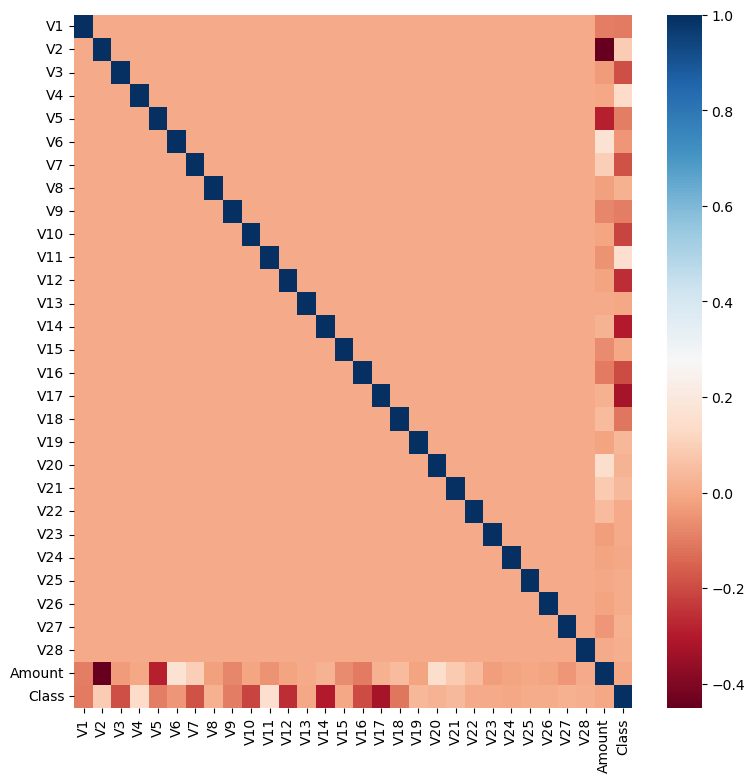

In [46]:
import seaborn as sns

plt.figure(figsize = (9,9))
corr = df.corr()
sns.heatmap(corr, cmap = "RdBu")

V17 V14 V12 V10 V7 V3

In [50]:
def cut_outlier(df, label, column, ratio = 1.5):
    fraud = df[df[label] ==1][column]
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    
    iqr = q75 - q25
    iqr_ratio = iqr * ratio
    lower = q25 - iqr_ratio
    higher = q75 + iqr_ratio
    
    index = fraud[(fraud < lower) | (fraud > higher)].index
    df.drop(index, inplace = True)
    return df

In [51]:
features = ['V17', 'V14', 'V12', 'V10', 'V7', 'V3']
for i in features:
    df = cut_outlier(df, "Class", i)

In [55]:
X_train, X_test, y_train, y_test = preprocessing(df, "Class")

lr = LogisticRegression()
lgbm = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)

lr.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_pred_proba = lr.predict_proba(X_test)

lgbm_pred = lgbm.predict(X_test)
lgbm_pred_proba = lgbm.predict_proba(X_test)

In [56]:
get_scores(y_test, lr_pred, lr_pred_proba)

[[85286     9]
 [   46    71]]
accuracy score : 0.999
precision score : 0.887
recall score : 0.607
f1 score : 0.721
AUC score : 0.958


In [57]:
get_scores(y_test, lgbm_pred, lgbm_pred_proba)

[[85292     3]
 [   32    85]]
accuracy score : 1.0
precision score : 0.966
recall score : 0.726
f1 score : 0.829
AUC score : 0.969


Q5. 신용카드 데이터에 SMOTE 오버 샘플링 적용 후 LightGBM 모델을 이용하여 학습, 예측, 평가를 수행하세요.

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [61]:
X_train, X_test, y_train, y_test = preprocessing(df, "Class")

lr = LogisticRegression()
lgbm = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)

lr.fit(X_train_over, y_train_over)
lgbm.fit(X_train_over, y_train_over)

lr_pred = lr.predict(X_test)
lr_pred_proba = lr.predict_proba(X_test)

lgbm_pred = lgbm.predict(X_test)
lgbm_pred_proba = lgbm.predict_proba(X_test)

In [62]:
get_scores(y_test, lr_pred, lr_pred_proba)

[[82645  2650]
 [   16   101]]
accuracy score : 0.969
precision score : 0.0367
recall score : 0.863
f1 score : 0.0704
AUC score : 0.96


In [63]:
get_scores(y_test, lgbm_pred, lgbm_pred_proba)

[[85287     8]
 [   29    88]]
accuracy score : 1.0
precision score : 0.917
recall score : 0.752
f1 score : 0.826
AUC score : 0.97


Q6. 사이킷런에서 제공해주는 load_boston 데이터셋을 가져와서 아래 사항을 수행하세요.
- 데이터셋의 타겟 이름을 'PRICE'로 지정한 후 데이터프레임을 생성 pickle 파일로 저장 후 다시 불어오세요.
- 히트맵을 이용하여 타겟과 상관관계가 높은 독립 변수를 선택하세요.
- 종속변수를 로그 변환하세요
- 위의 사항을 반영하여 선회회귀 모델을 생성 후 평가하고 회귀계수를 출력하세요.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [71]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF["PRICE"] = boston.target
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
bostonDF.to_pickle("bostonDF.pkl")
bostonDF = pd.read_pickle("bostonDF.pkl")

<AxesSubplot:>

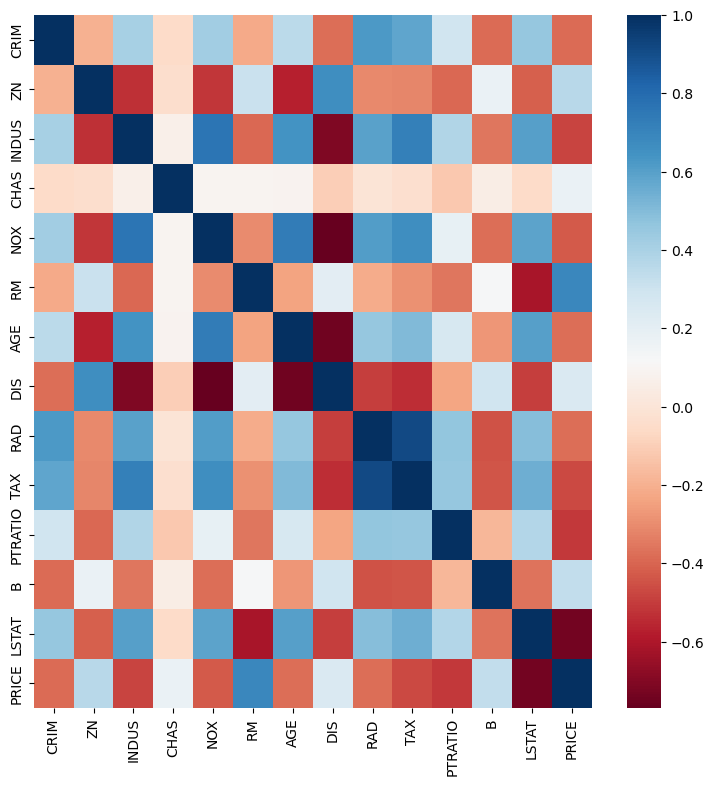

In [72]:
plt.figure(figsize = (9,9))
corr = bostonDF.corr()
sns.heatmap(corr, cmap = "RdBu")

In [73]:
bostonDF = log_transform(bostonDF, "PRICE")

In [87]:
X_data = bostonDF[["LSTAT","PTRATIO","INDUS","RM","PRICE"]].drop("PRICE", axis = 1)

In [81]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = preprocessing(bostonDF[["LSTAT","PTRATIO","INDUS","RM","PRICE"]], "PRICE")

lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.4f}, RMSE : {rmse:.4f}")
print(f"Variance score : {r2_score(y_test, pred):.4f}")

MSE : 0.0395, RMSE : 0.1988
Variance score : 0.7454


In [89]:
coeff = pd.Series(data = np.round(lr.coef_, 5), index = X_data.columns)
coeff.sort_values(ascending = False)

RM         0.07601
INDUS     -0.00145
LSTAT     -0.03278
PTRATIO   -0.03745
dtype: float64

Q7. house_df.pkl 데이터셋을 불러와서 아래사항을 수행하세요.

- alphas = [0, 0.1, 1, 10, 100] 를 적용하여 Ridge 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력 
- lasso_alphas = [0.07,0.1,0.5,1,3] 를 적용, Lasso 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력(def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True 사용자 함수 이용) 
- elastic_alphas = [0.07,0.1,0.5,1,3] 를 적용, ElasticNet 회귀 모델링 및 교차검증 후 5 폴드 평균 RMSE를 출력(사용자 함수 이용)

In [93]:
import pandas as pd
house = pd.read_csv('dataSet/house_price.csv')
houseDF = house.copy()

In [91]:
houseDF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [94]:
houseDF["SalePrice"] = np.log1p(houseDF["SalePrice"])
houseDF.drop(["Id","PoolQC","MiscFeature","Alley","Fence","FireplaceQu"], axis = 1, inplace = True)

houseDF.fillna(houseDF.mean(), inplace = True)
houseDF_ohe = pd.get_dummies(houseDF)

In [101]:
y_target = houseDF_ohe["SalePrice"]
X_data = houseDF_ohe.drop(["SalePrice"], axis = 1)

In [102]:
for i in [0, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha = i)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("alpha : ", i)
    print(" 5 folds 의 개별 Negative Mse scores : ", np.round(neg_mse_scores, 3))
    print(" 5 folds 의 개별 RMSE scores : ", np.round(rmse_scores,3))
    print(" 5 folds 의 평균 RMSE : ", round(avg_rmse,3))

alpha :  0
 5 folds 의 개별 Negative Mse scores :  [-5.76788929e+16 -7.37356766e+16 -7.80878209e+16 -3.60164834e+17
 -5.41454178e+17]
 5 folds 의 개별 RMSE scores :  [2.40164304e+08 2.71543139e+08 2.79441981e+08 6.00137346e+08
 7.35835701e+08]
 5 folds 의 평균 RMSE :  425424494.188
alpha :  0.1
 5 folds 의 개별 Negative Mse scores :  [-0.016 -0.026 -0.026 -0.013 -0.038]
 5 folds 의 개별 RMSE scores :  [0.128 0.162 0.16  0.112 0.196]
 5 folds 의 평균 RMSE :  0.152
alpha :  1
 5 folds 의 개별 Negative Mse scores :  [-0.014 -0.024 -0.02  -0.014 -0.036]
 5 folds 의 개별 RMSE scores :  [0.117 0.154 0.142 0.117 0.189]
 5 folds 의 평균 RMSE :  0.144
alpha :  10
 5 folds 의 개별 Negative Mse scores :  [-0.013 -0.022 -0.017 -0.014 -0.035]
 5 folds 의 개별 RMSE scores :  [0.115 0.148 0.13  0.118 0.186]
 5 folds 의 평균 RMSE :  0.139
alpha :  100
 5 folds 의 개별 Negative Mse scores :  [-0.014 -0.023 -0.017 -0.014 -0.039]
 5 folds 의 개별 RMSE scores :  [0.118 0.153 0.131 0.119 0.196]
 5 folds 의 평균 RMSE :  0.144


In [103]:
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose : print("#######", model_name, "#######")
    for param in params:
        if model_name == "Ridge" : model = Ridge(alpha = param)
        elif model_name == "Lasso" : model = Lasso(alpha = param)
        elif model_name == "ElasticNet" : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = "neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print(f"alpha {param}일 때 5폴드 세트의 평균 RMSE : {avg_rmse:.3f}")
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = "alpha : " + str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [105]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval("Lasso", params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

####### Lasso #######
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 0.186
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.188
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 0.190
alpha 1일 때 5폴드 세트의 평균 RMSE : 0.198
alpha 3일 때 5폴드 세트의 평균 RMSE : 0.228


In [108]:
from sklearn.linear_model import ElasticNet

elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval("ElasticNet", params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

####### ElasticNet #######
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 0.176
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 0.186
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 0.188
alpha 1일 때 5폴드 세트의 평균 RMSE : 0.193
alpha 3일 때 5폴드 세트의 평균 RMSE : 0.215


Q8. load_boston 데이터셋을 불러와서 다음사항을 수행하세요.
- SVM 알고리즘을 활용한 주택가격 예측모델 생성 및 평가(MSE, RMSE, R2)
- 개발된 예측모델을 활용하여 아래 test_data가 주어졌은때의 주택가격 예측<br>
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]

In [113]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn import svm

data = datasets.load_boston()

X, y = shuffle(data.data, data.target, random_state = 7)

num_training = int(0.8 * len(X))

X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

svm_model = svm.SVC(kernel = "linear", random_state = 0)
svm_model.fit(X_train, y_train)

test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
svm.predict(test_data)

ValueError: Unknown label type: 'continuous'

Q9. mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 
큰 값을 가지는 레코드 수를 구하시오

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = pd.read_csv('dataset/mtcars.csv',index_col=0)

Q10. purdata.csv는 백화점 고객의 1년 간 구매 데이터이다. 아래사항을 수행하세요.
 
- 남성고객을 분류하는 모델을 생성(분류알고리즘 : dt,rf,lr)
- 모델 성능을 roc_auc로 평가 

In [31]:
# df.to_csv('./dataset/purdata.csv',index=False)
df = pd.read_csv('./dataset/purdata.csv')
df.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,*,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,*,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0
